Average Balance by Gender and Geography - Table1
Geography     France     Germany      Spain        All
Gender                                                
Female     60,323.00  119,146.00  59,862.00  75,659.00
Male       63,546.00  120,260.00  63,353.00  77,174.00
All        62,093.00  119,730.00  61,818.00  76,486.00
Chart 1


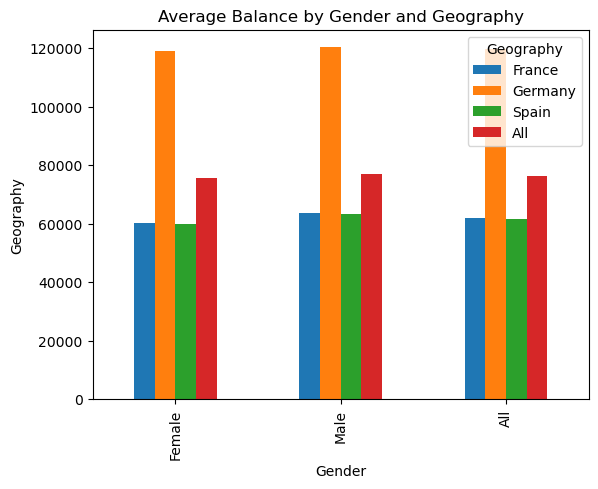

Whether they have a credit card by Geography - Table2
HasCrCard     0     1
Geography            
France     1471  3543
Germany     718  1791
Spain       756  1721
Chart 2


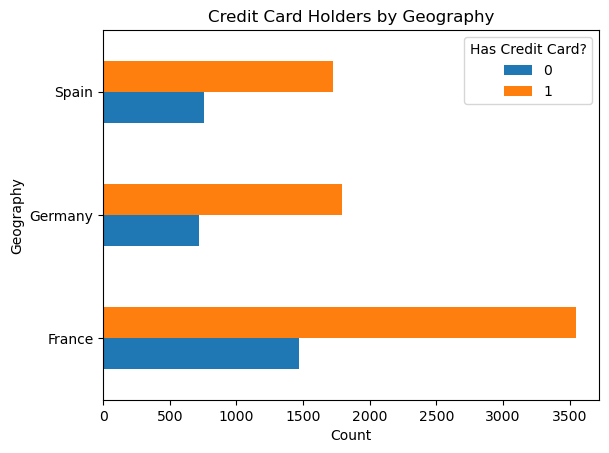

Total Sales Revenue by Sales Rep and Product - Table3
Product Name     3 Musketeers  Baby Ruth  Gummi bears  Jolly Ranchers  \
SalesRep                                                                
Andre Agassi         54435568   11969315     12007376        61003908   
Roger Federer        39786320    9241160      9005248        49205520   
Serena Williams      53191616    9323025      9368928        48191010   
Steffi Graff         76387840   15077380     15258128        80607954   

Product Name     Junior Mints  Milk Duds    Payday       Pez  Pop Rocks  \
SalesRep                                                                  
Andre Agassi          8570400    7183944  12852600  10621593   14827128   
Roger Federer         7510800    5524596  10439715   8628480   11493048   
Serena Williams       6996000    5468616   9899540   8934786   12413136   
Steffi Graff         11943600    9134460  17658065  13961061   20875776   

Product Name       Reeces  StarBursts  Swedish Fish  Too

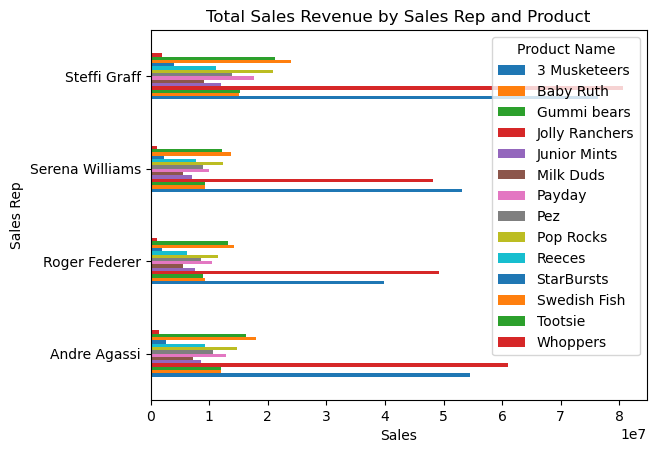

Average Credit Score by Geography and Tenure - Table4
Geography  France Germany   Spain     All
Tenure                                   
0          650.00  655.00  653.00  652.00
1          647.00  655.00  646.00  649.00
2          650.00  656.00  654.00  653.00
3          650.00  652.00  651.00  651.00
4          654.00  650.00  648.00  652.00
5          649.00  655.00  649.00  651.00
6          647.00  653.00  643.00  647.00
7          647.00  651.00  654.00  650.00
8          647.00  642.00  654.00  648.00
9          657.00  645.00  657.00  654.00
10         647.00  659.00  662.00  654.00
All        650.00  651.00  651.00  651.00
Chart 4


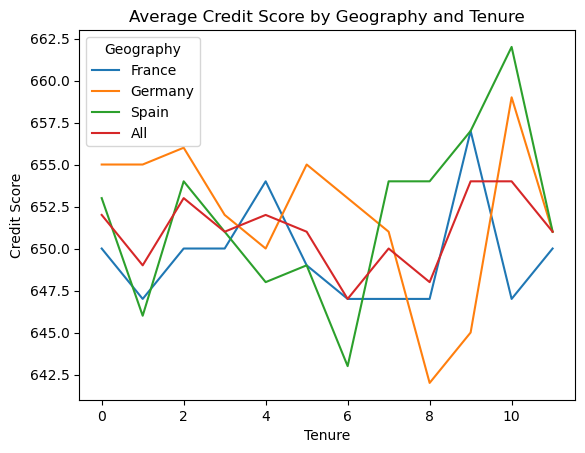

Bin #1 - Age and Credit Score
      Age    AgeBin  CreditScore CreditScoreBin
0      42  (40, 50]          619     (600, 700]
1      41  (40, 50]          608     (600, 700]
2      42  (40, 50]          502     (500, 600]
3      39  (30, 40]          699     (600, 700]
4      43  (40, 50]          850     (800, 900]
...   ...       ...          ...            ...
9995   39  (30, 40]          771     (700, 800]
9996   35  (30, 40]          516     (500, 600]
9997   36  (30, 40]          709     (700, 800]
9998   42  (40, 50]          772     (700, 800]
9999   28   (0, 30]          792     (700, 800]

[10000 rows x 4 columns]
Bin Chart # 1


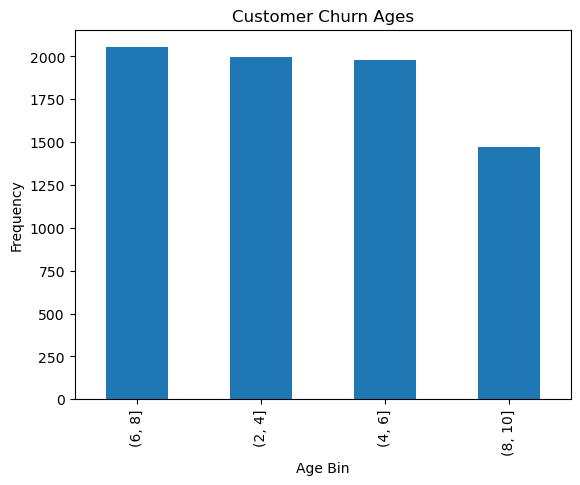

Bin Chart # 2


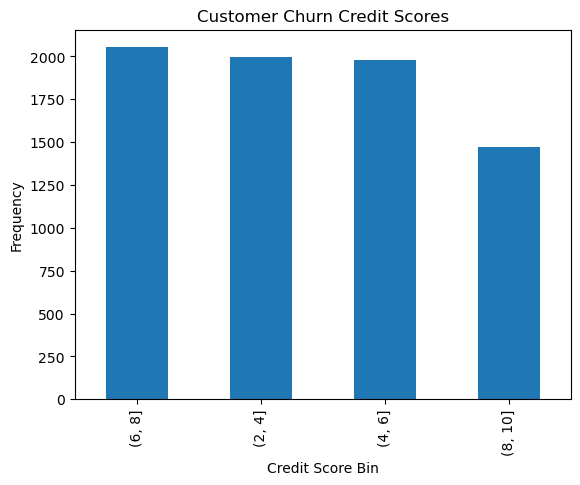

Bin #2 - Tenure
      Tenure    TenureBin
0          2          NaN
1          1          NaN
2          8   (6.0, 8.0]
3          1          NaN
4          2          NaN
...      ...          ...
9995       5   (4.0, 6.0]
9996      10  (8.0, 10.0]
9997       7   (6.0, 8.0]
9998       3   (2.0, 4.0]
9999       4   (2.0, 4.0]

[10000 rows x 2 columns]
Bin Chart # 3


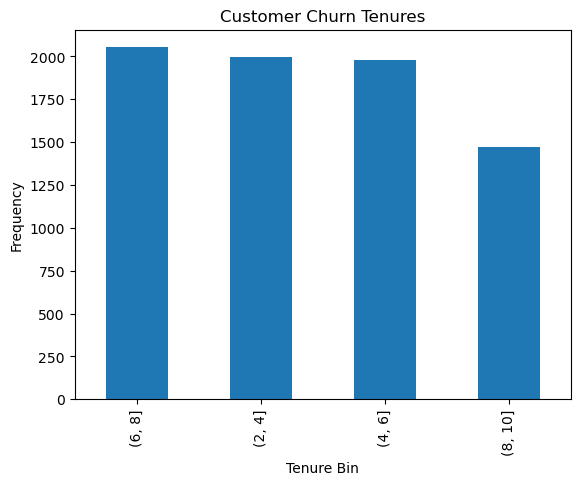

In [146]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

churnDF = pd.read_excel('C:/Users/Rowan/Desktop/INFO 3100/Churn_Modelling.xlsx', sheet_name='Churn_Modelling',
                        skiprows=(0),
                      names=['RowNumber','CustomerId','Surname','CreditScore',
                      'Geography','Gender','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Exited' ], usecols='A:N')



tennisDF = pd.read_excel('C:/Users/Rowan/Desktop/INFO 3100/SalesTennisGreats.xlsx', sheet_name='Tennis Greats',
                        skiprows=(0),
                      names=['OrderDate','ProductID', 'Product Name', 'Quantity Sold','Unit Sales Price',
                      'Total Sales Revenue','Unit Cost','Total Cost','Unit Profit', 'Total Profit', 
                             'CustomerID', 'Customer', 'SalesRep'], usecols='A:M')

#Create and Format table 1
print("Average Balance by Gender and Geography - Table1")
pt = round(churnDF.pivot_table(values = 'Balance', index='Gender', columns='Geography', aggfunc='mean', margins=True))
formatted_pt = pt.applymap("{:,.2f}".format)
print(formatted_pt)

#Print chart 1
print("Chart 1")
pt.plot(kind='bar')
plt.title('Average Balance by Gender and Geography')
plt.xlabel('Gender')
plt.ylabel('Geography')
plt.show()


print("Whether they have a credit card by Geography - Table2")
ct = pd.crosstab(churnDF['Geography'], churnDF['HasCrCard'])
print(ct)

print("Chart 2")
ct.plot(kind='barh')
plt.title('Credit Card Holders by Geography')
plt.xlabel('Count')
plt.ylabel('Geography')
plt.legend(title='Has Credit Card?', loc='best')
plt.show()

print("Total Sales Revenue by Sales Rep and Product - Table3")
salesrevct = pd.crosstab(index=tennisDF['SalesRep'], 
                               columns=tennisDF['Product Name'], 
                               values=tennisDF['Total Sales Revenue'], 
                               aggfunc='sum')
print(salesrevct)

print("Chart 3")
salesrevct.plot(kind='barh')
plt.title('Total Sales Revenue by Sales Rep and Product')
plt.xlabel('Sales')
plt.ylabel('Sales Rep')
plt.legend(title='Product Name', loc='best')
plt.show()

print("Average Credit Score by Geography and Tenure - Table4")
pt2 = round(churnDF.pivot_table(values = 'CreditScore', index='Tenure', columns='Geography', aggfunc='mean', margins=True))
formatted_pt2 = pt2.applymap("{:,.2f}".format)
print(formatted_pt2)

print("Chart 4")
pt2.plot(kind='line')
plt.title('Average Credit Score by Geography and Tenure')
plt.xlabel('Tenure')
plt.ylabel('Credit Score')
plt.show()

#Bins 1-3
binsA = [0, 30, 40, 50, 60, 100]
binsCS = [0, 400, 500, 600, 700, 800, 900]
binsTenure = [2, 4, 6, 8, 10]

# create new columns for the age and credit score bins
churnDF['AgeBin'] = pd.cut(churnDF['Age'], bins=binsA)
churnDF['CreditScoreBin'] = pd.cut(churnDF['CreditScore'], bins=binsCS)

churnDF['TenureBin'] = pd.cut(churnDF['Tenure'], bins=binsTenure)


print("Bin #1 - Age and Credit Score")
print(churnDF[['Age', 'AgeBin', 'CreditScore', 'CreditScoreBin']])

#Ages Bin Bar Chart
print("Bin Chart # 1")
ages_counts = churnDF['AgeBin'].value_counts()
tenure_counts.plot.bar()
plt.title('Customer Churn Ages')
plt.xlabel('Age Bin')
plt.ylabel('Frequency')
plt.show()

print("Bin Chart # 2")
ages_counts = churnDF['CreditScoreBin'].value_counts()
tenure_counts.plot.bar()
plt.title('Customer Churn Credit Scores')
plt.xlabel('Credit Score Bin')
plt.ylabel('Frequency')
plt.show()

print("Bin #2 - Tenure")
print(churnDF[['Tenure', 'TenureBin']])
tenure_counts = churnDF['TenureBin'].value_counts()

#Tenure Bin Bar Chart
print("Bin Chart # 3")
tenure_counts.plot.bar()
plt.title('Customer Churn Tenures')
plt.xlabel('Tenure Bin')
plt.ylabel('Frequency')
plt.show()


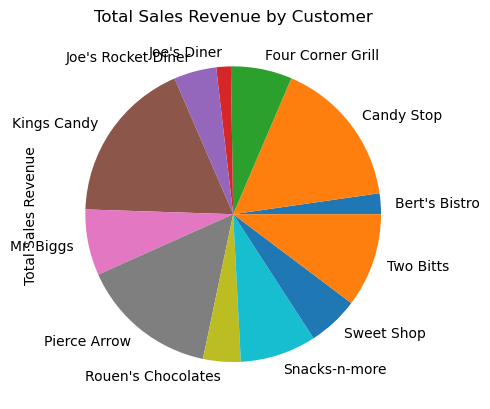

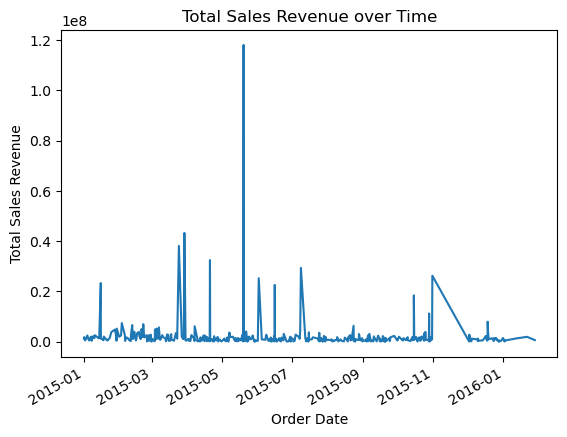

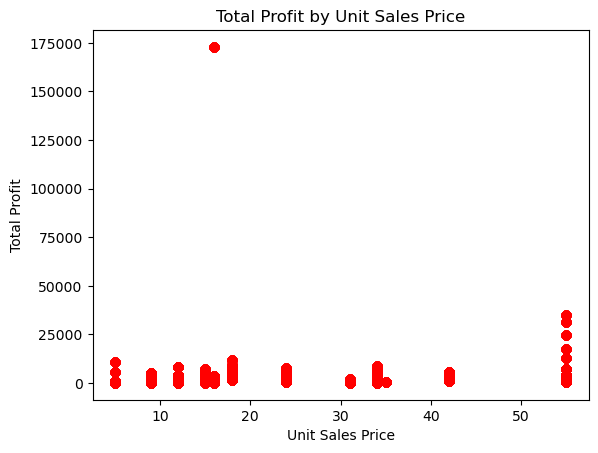

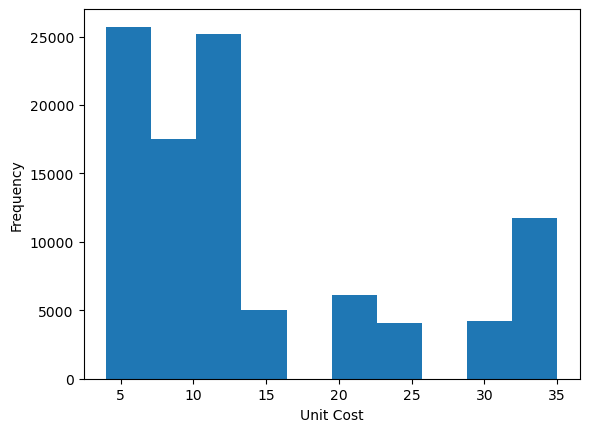

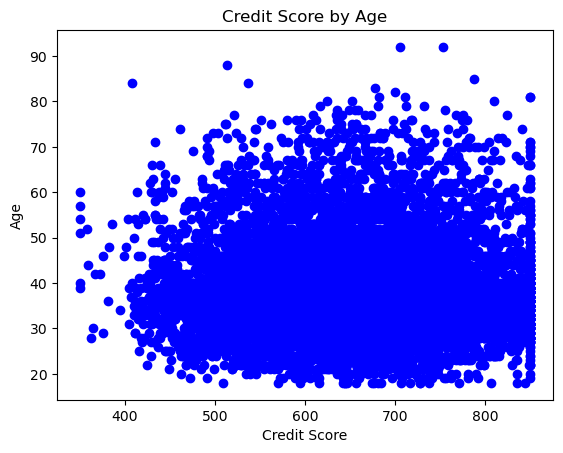

Number of Orders Per Customer
Candy Stop            16288
Pierce Arrow          14920
Four Corner Grill     11648
Two Bitts             11032
Snacks-n-more          8730
Mr. Biggs              8637
Kings Candy            7370
Sweet Shop             7225
Joe's Rocket Diner     7168
Rouen's Chocolates     3456
Joe's Diner            2176
Bert's Bistro          1018
Name: Customer, dtype: int64
Order count by Customer, vertical bar graph


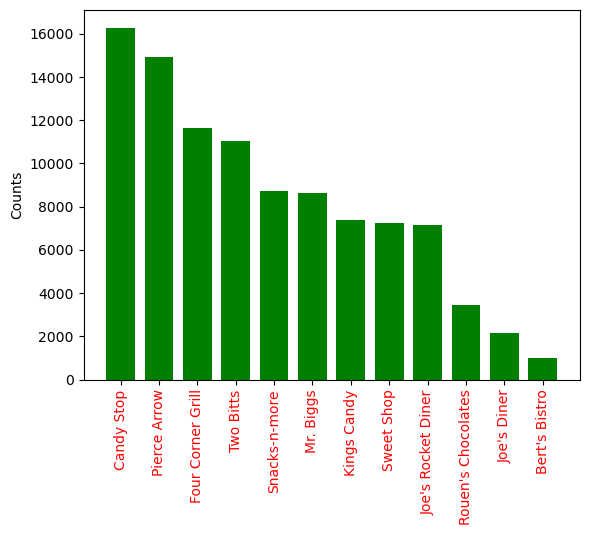

In [122]:
#6 Required Graphs

customer_sales = tennisDF.groupby('Customer')['Total Sales Revenue'].sum()
customer_sales.plot(kind='pie', title='Total Sales Revenue by Customer', legend=False)
plt.show()


time_sales = tennisDF.groupby('OrderDate')['Total Sales Revenue'].sum()
time_sales.plot(kind='line', title='Total Sales Revenue over Time', xlabel='Order Date', ylabel='Total Sales Revenue')
plt.show()


plt.scatter(tennisDF['Unit Sales Price'], tennisDF['Total Profit'], color='red')
plt.title('Total Profit by Unit Sales Price')
plt.xlabel('Unit Sales Price')
plt.ylabel('Total Profit')
plt.show()

plt.hist(tennisDF['Unit Cost'], bins=10)
plt.xlabel('Unit Cost')
plt.ylabel('Frequency')
plt.show()

plt.scatter(churnDF['CreditScore'],churnDF['Age'], color='blue')
plt.title('Credit Score by Age')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

quantitysoldcount = tennisDF.Customer.value_counts()
print("Number of Orders Per Customer")
print(quantitysoldcount)
print("Order count by Customer, vertical bar graph")
y = list(quantitysoldcount)  
n=len(y)                   
x=np.arange(n)             
plt.bar(x,y, width=.75,color='green')
plt.ylabel('Counts')
plt.xticks(x,quantitysoldcount.index,color='red', rotation='vertical')
plt.show()




Hypothesis Test #1 - Estimated Salary and IsActiveMember
                EstimatedSalary
IsActiveMember                 
0                 100767.203854
1                  99452.965894
This is a test of equal variances
Ho: The variances are equal
Ha: The variances are not equal
The t test statistic is 0.015 and the p-value is 0.902

If p-value is less than alpha, then reject Ho
p-value = 0.902
alpha = .05
Because p-value is not less than alpha
Conclusion: Fail to Reject Ho: We can't reject that the variances are the same


Test for the means of 2 independent variables
Ho:  The means for Estimated Salary, regardless of if they are a member, are the same
Ha:  The means for Estimated Salary, based on if they are a member, are not the same
Alpha = .05


This is a Two-Sample t test (assuming equal variances) of equal means
Ho: The group means of Estimated Salary, regardless of if they are a member, are equal
Ha: The group means of Estimated Salary, based on if they are a member, are not the

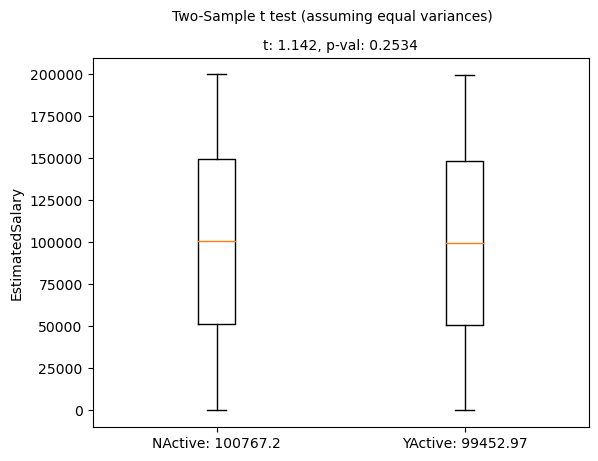

In [139]:
#Hypothesis Testing # 1
print("Hypothesis Test #1 - Estimated Salary and IsActiveMember")
print(churnDF.pivot_table(['EstimatedSalary'], index=['IsActiveMember']))
NActive=churnDF[churnDF['IsActiveMember']==0]
YActive=churnDF[churnDF['IsActiveMember']==1]
alpha = .05
tvar, p_valvar = stats.bartlett(NActive['EstimatedSalary'],YActive['EstimatedSalary'])

print("This is a test of equal variances")
print("Ho: The variances are equal")
print("Ha: The variances are not equal")
print(f"The t test statistic is {round(tvar,3)} and the p-value is {round(p_valvar,4)}")
print()
print("If p-value is less than alpha, then reject Ho")
print("p-value = " +str(round(p_valvar,4)))
print ("alpha = .05")
if p_valvar < alpha :
    print("Because p-value is less than alpha")
    print("Conclusion: Reject Ho: The variances are not equal")
    tEqVar=False
    ttype='Welch (unequal variances) Two-Sample t test'
else:
    print("Because p-value is not less than alpha")
    print("Conclusion: Fail to Reject Ho: We can't reject that the variances are the same")
    tEqVar=True
    ttype='Two-Sample t test (assuming equal variances)'

print()
print()

print("Test for the means of 2 independent variables")
print("Ho:  The means for Estimated Salary, regardless of if they are a member, are the same")
print("Ha:  The means for Estimated Salary, based on if they are a member, are not the same")
print("Alpha = .05")
alpha = .05
tmean, p_valmean = stats.ttest_ind(NActive['EstimatedSalary'],
                                   YActive['EstimatedSalary'],equal_var=tEqVar)
print()
print()


print("This is a " + ttype + " of equal means")
print("Ho: The group means of Estimated Salary, regardless of if they are a member, are equal")
print("Ha: The group means of Estimated Salary, based on if they are a member, are not the same")


print(f"The t test statistic is {round(tmean,3)} and the p-value is {round(p_valmean,4)}")


print()
print("If p-value is less than alpha, then reject Ho")
print("p-value = " +str(round(p_valmean,4)))
print ("alpha = .05")
if p_valmean < alpha:
    print("Because p-value is less than alpha")
    print("Conclusion: Reject Ho: The means are not equal")
else:
    print("Because p-value is greater than alpha")
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    
y=[NActive['EstimatedSalary'],YActive['EstimatedSalary']]
plt.boxplot(y)
plt.title(f't: {round(tmean,3)}, p-val: {round(p_valmean,4)}', size=10)
plt.suptitle(ttype, size=10)
plt.xticks(range(1,3),[f"NActive: {round(NActive['EstimatedSalary'].mean(),2)}",
f"YActive: {round(YActive['EstimatedSalary'].mean(),2)}"])
plt.ylabel('EstimatedSalary')
plt.savefig('ttest.png', bbox_inches='tight')
plt.show()


Hypothesis Test #2 - Credit Score and Gender
        CreditScore
Gender             
Female   650.831389
Male     650.276892
This is a test of equal variances
Ho: The variances are equal
Ha: The variances are not equal
The t test statistic is 0.03 and the p-value is 0.8626

If p-value is less than alpha, then reject Ho
p-value = 0.8626
alpha = .05
Because p-value is not less than alpha
Conclusion: Fail to Reject Ho: We can't reject that the variances are the same


Test for the means of 2 independent variables
Ho:  The means for Credit Score, regardless of Gender, are the same
Ha:  The means for Credit Score, based on Gender, are not the same
Alpha = .05


This is a Two-Sample t test (assuming equal variances) of equal means
Ho: The group means of Credit Score, regardless of Gender, are equal
Ha: The group means of Credit Score, based on Gender, are not the same
The t test statistic is -0.286 and the p-value is 0.7752

If p-value is less than alpha, then reject Ho
p-value = 0.7752
alph

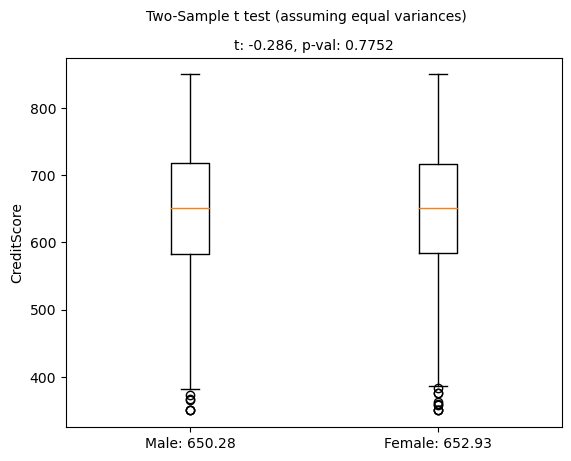

In [137]:
#Hypothesis Testing # 2
print("Hypothesis Test #2 - Credit Score and Gender")
print(churnDF.pivot_table(['CreditScore'], index=['Gender']))
Male=churnDF[churnDF['Gender']=='Male']
Female=churnDF[churnDF['Gender']=='Female']
alpha = .05
tvar, p_valvar = stats.bartlett(Male['CreditScore'],Female['CreditScore'])

print("This is a test of equal variances")
print("Ho: The variances are equal")
print("Ha: The variances are not equal")
print(f"The t test statistic is {round(tvar,3)} and the p-value is {round(p_valvar,4)}")
print()
print("If p-value is less than alpha, then reject Ho")
print("p-value = " +str(round(p_valvar,4)))
print ("alpha = .05")
if p_valvar < alpha :
    print("Because p-value is less than alpha")
    print("Conclusion: Reject Ho: The variances are not equal")
    tEqVar=False
    ttype='Welch (unequal variances) Two-Sample t test'
else:
    print("Because p-value is not less than alpha")
    print("Conclusion: Fail to Reject Ho: We can't reject that the variances are the same")
    tEqVar=True
    ttype='Two-Sample t test (assuming equal variances)'
    

print()
print()


print("Test for the means of 2 independent variables")
print("Ho:  The means for Credit Score, regardless of Gender, are the same")
print("Ha:  The means for Credit Score, based on Gender, are not the same")
print("Alpha = .05")
alpha = .05
tmean, p_valmean = stats.ttest_ind(Male['CreditScore'],
                                   Female['CreditScore'],equal_var=tEqVar)
print()
print()


print("This is a " + ttype + " of equal means")
print("Ho: The group means of Credit Score, regardless of Gender, are equal")
print("Ha: The group means of Credit Score, based on Gender, are not the same")


print(f"The t test statistic is {round(tmean,3)} and the p-value is {round(p_valmean,4)}")


print()
print("If p-value is less than alpha, then reject Ho")
print("p-value = " +str(round(p_valmean,4)))
print ("alpha = .05")
if p_valmean < alpha:
    print("Because p-value is less than alpha")
    print("Conclusion: Reject Ho: The means are not equal")
else:
    print("Because p-value is greater than alpha")
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    
y=[Male['CreditScore'],Female['CreditScore']]
plt.boxplot(y)
plt.title(f't: {round(tmean,3)}, p-val: {round(p_valmean,4)}', size=10)
plt.suptitle(ttype, size=10)
plt.xticks(range(1,3),[f"Male: {round(Male['CreditScore'].mean(),2)}",
f"Female: {round(YActive['CreditScore'].mean(),2)}"])
plt.ylabel('CreditScore')
plt.savefig('ttest.png', bbox_inches='tight')
plt.show()

Hypothesis Test #3 - Balance and Exited
             Balance
Exited              
0       72745.296779
1       91108.539337

This is a test of equal variances
Ho: The variances are equal
Ha: The variances are not equal
The t test statistic is 17.271 and the p-value is 0.0

If p-value is less than alpha, then reject Ho
p-value = 0.0
alpha = .05
Because p-value is less than alpha
Conclusion: Reject Ho: The variances are not equal


Test for the means of 2 independent variables
Ho:  The means for Balance, regardless of if they exited, are the same
Ha:  The means for Balance, based on if they exited, are not the same
Alpha = .05


This is a Welch (unequal variances) Two-Sample t test of equal means
Ho: The group means of Balance, regardless of if they exited, are equal
Ha: The group means of Balance, based on if they exited, are not the same
The t test statistic is -12.471 and the p-value is 0.0

If p-value is less than alpha, then reject Ho
p-value = 0.0
alpha = .05
Because p-value is les

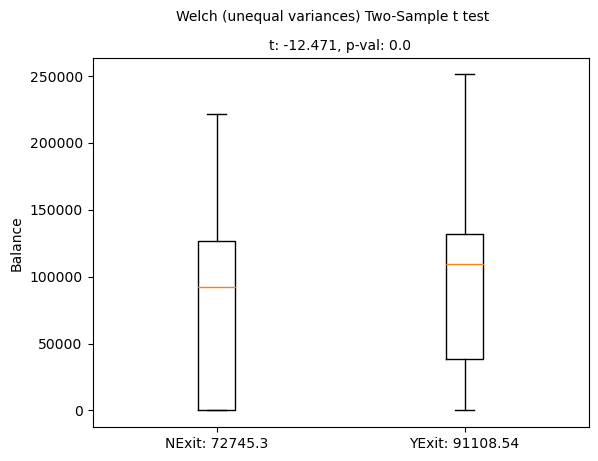

In [140]:
#Hypothesis Testing # 3
print("Hypothesis Test #3 - Balance and Exited")
print(churnDF.pivot_table(['Balance'], index=['Exited']))
print()

NExit=churnDF[churnDF['Exited']==0]
YExit=churnDF[churnDF['Exited']==1]

alpha = .05
tvar, p_valvar = stats.bartlett(NExit['Balance'],YExit['Balance'])

print("This is a test of equal variances")
print("Ho: The variances are equal")
print("Ha: The variances are not equal")
print(f"The t test statistic is {round(tvar,3)} and the p-value is {round(p_valvar,4)}")
print()
print("If p-value is less than alpha, then reject Ho")
print("p-value = " +str(round(p_valvar,4)))
print ("alpha = .05")
if p_valvar < alpha :
    print("Because p-value is less than alpha")
    print("Conclusion: Reject Ho: The variances are not equal")
    tEqVar=False
    ttype='Welch (unequal variances) Two-Sample t test'
else:
    print("Because p-value is not less than alpha")
    print("Conclusion: Fail to Reject Ho: We can't reject that the variances are the same")
    tEqVar=True
    ttype='Two-Sample t test (assuming equal variances)'
    

print()
print()


print("Test for the means of 2 independent variables")
print("Ho:  The means for Balance, regardless of if they exited, are the same")
print("Ha:  The means for Balance, based on if they exited, are not the same")
print("Alpha = .05")
alpha = .05
tmean, p_valmean = stats.ttest_ind(NExit['Balance'],
                                   YExit['Balance'],equal_var=tEqVar)
print()
print()


print("This is a " + ttype + " of equal means")
print("Ho: The group means of Balance, regardless of if they exited, are equal")
print("Ha: The group means of Balance, based on if they exited, are not the same")


print(f"The t test statistic is {round(tmean,3)} and the p-value is {round(p_valmean,4)}")


print()
print("If p-value is less than alpha, then reject Ho")
print("p-value = " +str(round(p_valmean,4)))
print ("alpha = .05")
if p_valmean < alpha:
    print("Because p-value is less than alpha")
    print("Conclusion: Reject Ho: The means are not equal")
else:
    print("Because p-value is greater than alpha")
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    
y=[NExit['Balance'],YExit['Balance']]
plt.boxplot(y)
plt.title(f't: {round(tmean,3)}, p-val: {round(p_valmean,4)}', size=10)
plt.suptitle(ttype, size=10)
plt.xticks(range(1,3),[f"NExit: {round(NExit['Balance'].mean(),2)}",
f"YExit: {round(YExit['Balance'].mean(),2)}"])
plt.ylabel('Balance')
plt.savefig('ttest.png', bbox_inches='tight')
plt.show()

ANOVA Test #1 - Sales Rep and Total Profit
This is a test of equal means
Ho: The means of all groups are equal
Ha: At least one group mean is different
The F test statistic is 2.007 and the p-value is 0.1107
Conclusion: Reject Ho: At least one group mean is different

Region by TotalSales columns
                 Total Profit
SalesRep                     
Andre Agassi      2477.602087
Roger Federer     2444.847018
Serena Williams   2596.363578
Steffi Graff      2522.289469


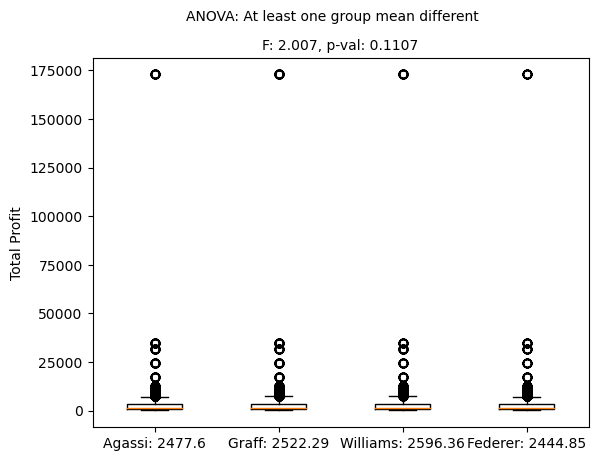

           Multiple Comparison of Means - Tukey HSD, FWER=0.20           
     group1          group2     meandiff p-adj    lower    upper   reject
-------------------------------------------------------------------------
   Andre Agassi   Roger Federer -32.7551 0.9541 -156.5501    91.04  False
   Andre Agassi Serena Williams 118.7615 0.2313   -4.7799 242.3028  False
   Andre Agassi    Steffi Graff  44.6874 0.8511  -64.2999 153.6747  False
  Roger Federer Serena Williams 151.5166 0.1029   20.6575 282.3756   True
  Roger Federer    Steffi Graff  77.4425 0.5626  -39.7747 194.6596  False
Serena Williams    Steffi Graff -74.0741  0.597 -191.0232   42.875  False
-------------------------------------------------------------------------


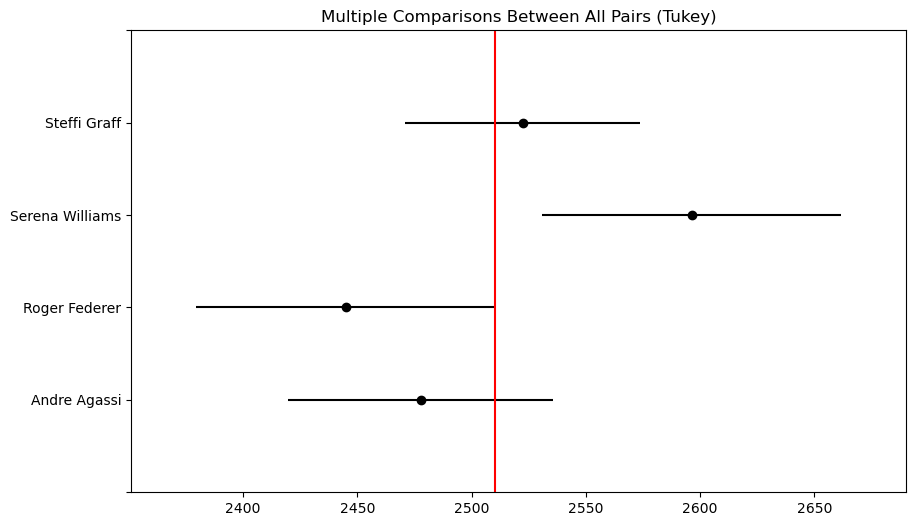

In [142]:
#ANOVA Test # 1
# split the data into 4 groups
print("ANOVA Test #1 - Sales Rep and Total Profit")
Agassi = tennisDF[tennisDF['SalesRep']=='Andre Agassi']
Graff = tennisDF[tennisDF['SalesRep']=='Steffi Graff']
Williams  = tennisDF[tennisDF['SalesRep']=='Serena Williams']
Federer  = tennisDF[tennisDF['SalesRep']=='Roger Federer']

alpha = .2
f, p_val = stats.f_oneway(Agassi['Total Profit'],Graff['Total Profit'],Williams['Total Profit'],Federer['Total Profit'])

print("This is a test of equal means")
print("Ho: The means of all groups are equal")
print("Ha: At least one group mean is different")

print(f"The F test statistic is {round(f,3)} and the p-value is {round(p_val,4)}")

if p_val < alpha:
    print("Conclusion: Reject Ho: At least one group mean is different")
    ANOVAtype = "ANOVA: At least one group mean different"
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    ANOVAtype = "ANOVA: Group Means are the same"

print()
print("Region by TotalSales columns")
print(tennisDF.pivot_table(['Total Profit'], index=['SalesRep']))

# Box plot of means for Total Profit
y=[Agassi['Total Profit'],
   Graff['Total Profit'],
   Williams['Total Profit'],
   Federer['Total Profit']]
plt.boxplot(y)
plt.title(f'F: {round(f,3)}, p-val: {round(p_val,4)}',size=10)
plt.suptitle(ANOVAtype,size=10)
plt.xticks(range(1,5), [f"Agassi: {round(Agassi['Total Profit'].mean(),2)}",
                        f"Graff: {round(Graff['Total Profit'].mean(),2)}", 
                        f"Williams: {round(Williams['Total Profit'].mean(),2)}",
                        f"Federer: {round(Federer['Total Profit'].mean(),2)}"])
plt.ylabel('Total Profit')
plt.savefig('ANOVA.png', bbox_inches='tight')
plt.show()


# Tukey pairwise comparison

from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Data (endogenous/response variable)
tukey = pairwise_tukeyhsd(endog=tennisDF['Total Profit'],
                          groups=tennisDF['SalesRep'], alpha=0.2)

print(tukey.summary() )



tukey.plot_simultaneous() 
plt.vlines(x=tennisDF['Total Profit'].mean(),ymin=-1,ymax=7, color="red")
plt.show()

ANOVA Test #2 - Geography and Credit Score
This is a test of equal means
Ho: The means of all groups are equal
Ha: At least one group mean is different
The F test statistic is 0.399 and the p-value is 0.6707
Conclusion: Fail to Reject Ho: We can't reject that the means are the same

Region by TotalSales columns
           CreditScore
Geography             
France      649.668329
Germany     651.453567
Spain       651.333872


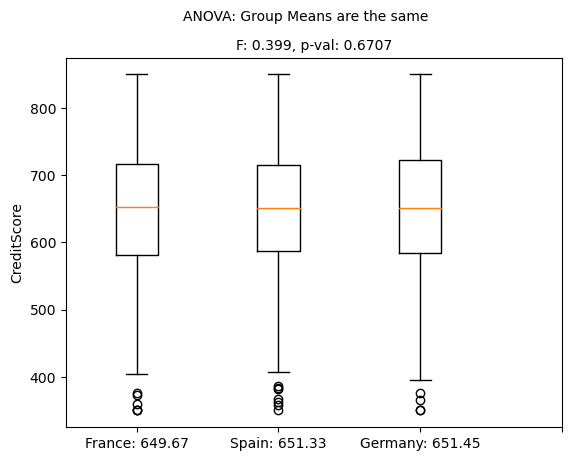

 Multiple Comparison of Means - Tukey HSD, FWER=0.20 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 France Germany   1.7852 0.7304 -2.2658 5.8363  False
 France   Spain   1.6655 0.7625 -2.4029  5.734  False
Germany   Spain  -0.1197 0.9989 -4.8119 4.5725  False
-----------------------------------------------------


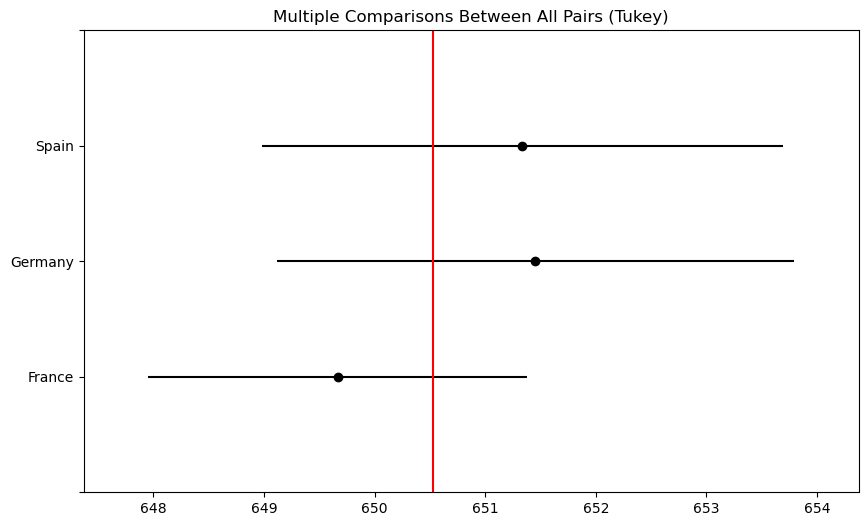

In [143]:
#ANOVA Test # 2
# split the data into 4 groups
print("ANOVA Test #2 - Geography and Credit Score")
France = churnDF[churnDF['Geography']=='France']
Spain = churnDF[churnDF['Geography']=='Spain']
Germany  = churnDF[churnDF['Geography']=='Germany']

alpha = .2
f, p_val = stats.f_oneway(France['CreditScore'],Spain['CreditScore'],Germany['CreditScore'])

print("This is a test of equal means")
print("Ho: The means of all groups are equal")
print("Ha: At least one group mean is different")

print(f"The F test statistic is {round(f,3)} and the p-value is {round(p_val,4)}")

if p_val < alpha:
    print("Conclusion: Reject Ho: At least one group mean is different")
    ANOVAtype = "ANOVA: At least one group mean different"
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    ANOVAtype = "ANOVA: Group Means are the same"

print()
print("Region by TotalSales columns")
print(churnDF.pivot_table(['CreditScore'], index=['Geography']))

# Box plot of means for Credit Score
y=[France['CreditScore'],
   Spain['CreditScore'],
   Germany['CreditScore']]

plt.boxplot(y)
plt.title(f'F: {round(f,3)}, p-val: {round(p_val,4)}',size=10)
plt.suptitle(ANOVAtype,size=10)
plt.xticks(range(1, 5), [f"France: {round(France['CreditScore'].mean(),2)}",
                         f"Spain: {round(Spain['CreditScore'].mean(),2)}",
                         f"Germany: {round(Germany['CreditScore'].mean(),2)}",
                         ""])
                        
plt.ylabel('CreditScore')
plt.savefig('ANOVA.png', bbox_inches='tight')
plt.show()


# Tukey pairwise comparison

from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Data (endogenous/response variable)
tukey = pairwise_tukeyhsd(endog=churnDF['CreditScore'],
                          groups=churnDF['Geography'], alpha=0.2)

print(tukey.summary() )



tukey.plot_simultaneous() 
plt.vlines(x=churnDF['CreditScore'].mean(),ymin=-1,ymax=7, color="red")
plt.show()



Multiple Linear Regression #1 - Exited ~ Age + Tenure
ANALSIS FOR DETERMINING IF AGE AND TENURE PREDICT IF A CUSTOMER EXITS
Adjusted R-Squared: 0.08
P value: 0.0
Reject Ho: X variables do predict Loss
-0.215 + 0.011 Age + -0.002 Tenure


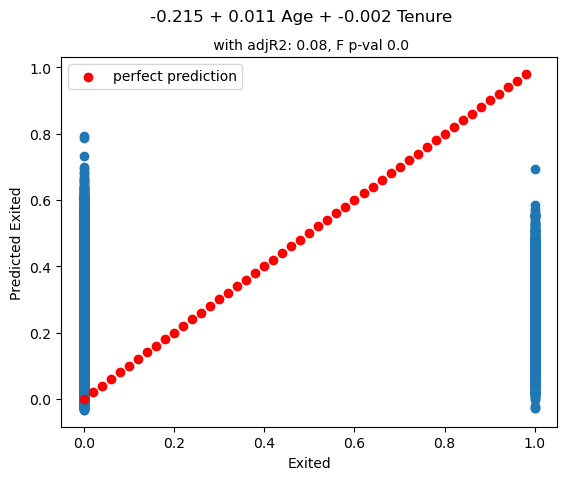

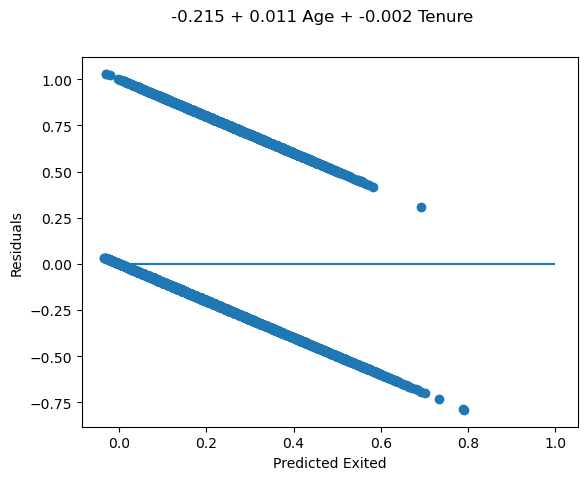



Multiple Linear Regression #2 - Estimated Salary ~ Credit Score + Tenure
ANALSIS FOR DETERMINING IF CREDIT SCORE AND TENURE PREDICT ESTIMATED SALARY
Adjusted R-Squared: -0.0
P value: 0.7316
Do not reject Ho
99852.605 + -0.828 CreditScore + 154.804 Tenure


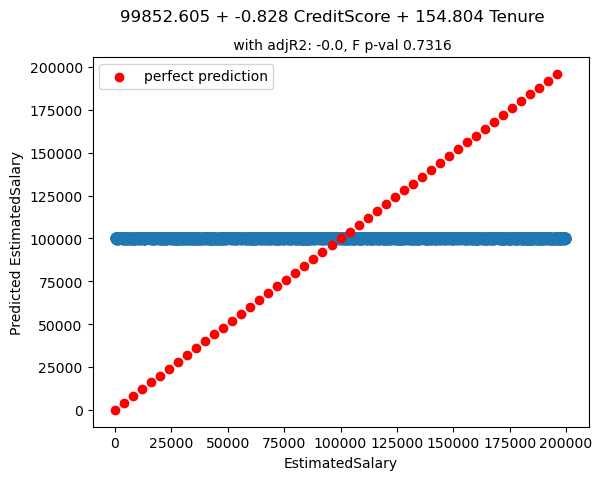

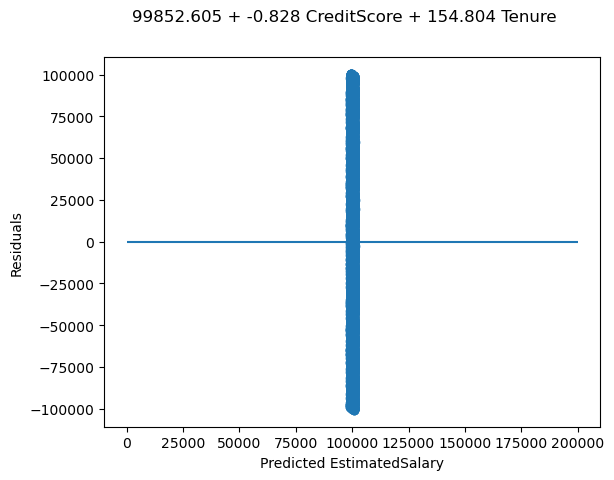



Multiple Linear Regression #3 - IsActiveMember ~ NumOfProducts + Gender
ANALSIS FOR DETERMINING IF NUMOFPRODUCTS AND GENDER PREDICT MEMBER STATUS
Adjusted R-Squared: 0.0
P value: 0.0473
Reject Ho: X variables do predict Loss
0.489 + 0.023 Gender[T.Male] + 0.009 NumOfProducts


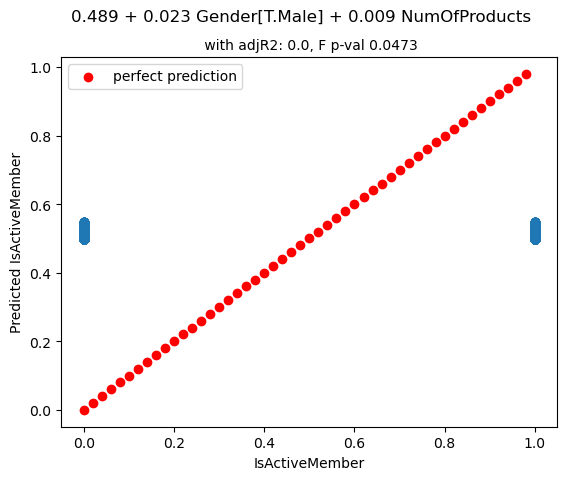

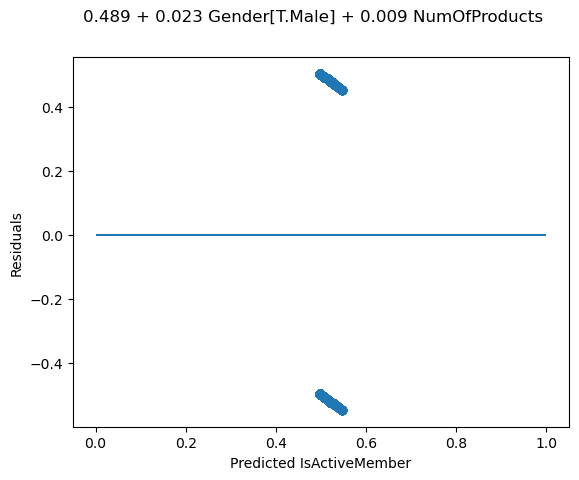

In [148]:
#Multiple Linear Regression # 1-3
from statsmodels.formula.api import ols

def MultipleRegressionAnalysis(MRModel) :
    r2adj = round(MRModel.rsquared_adj,2)                 
    p_val = round(MRModel.f_pvalue,4)
    
    coefs = MRModel.params
    coefsindex = coefs.index
    regeq = round(coefs[0],3)                              
    cnt = 1
    for i in coefs[1:]:
        regeq=f"{regeq} + {round(i,3)} {coefsindex[cnt]}"
        cnt = cnt + 1

    print("Adjusted R-Squared: " + str(r2adj))
    print("P value: " +str(p_val))
    if p_val < alpha :
        print ("Reject Ho: X variables do predict Loss")
    else :
        print ("Do not reject Ho")
    print(regeq)

    

def my_multreg(model, ydata):
    r2adj = round(model.rsquared_adj,2)
    p_val = round(model.f_pvalue,4)
    coefs = model.params
    coefsindex = coefs.index 
    regeq = round(coefs[0],3)
    cnt = 1
    for i in coefs[1:]:
        regeq=f"{regeq} + {round(i,3)} {coefsindex[cnt]}"
        cnt = cnt + 1
    
    miny=ydata.min()
    maxy=ydata.max()
    predict_y = model.predict()
    plt.scatter(ydata,predict_y)
    diag = np.arange(miny,maxy,(maxy-miny)/50)
    plt.scatter(diag,diag,color='red',label='perfect prediction')
    plt.suptitle(regeq)
    plt.title(f' with adjR2: {r2adj}, F p-val {p_val}',size=10)
    plt.xlabel(ydata.name)
    plt.ylabel('Predicted ' + ydata.name)
    plt.legend(loc='best')
    plt.show()
    
    
    resid = model.resid
    predict_y = model.predict()
    plt.scatter(predict_y, resid)
    plt.suptitle(regeq)
    plt.hlines(0,miny,maxy)
    plt.ylabel('Residuals')
    plt.xlabel('Predicted ' + ydata.name)
    plt.show()
      
alpha = .05

print()
print()
print("Multiple Linear Regression #1 - Exited ~ Age + Tenure")
DCmodel2 = ols("Exited ~ Age + Tenure",data=churnDF).fit()
print("ANALSIS FOR DETERMINING IF AGE AND TENURE PREDICT IF A CUSTOMER EXITS")
MultipleRegressionAnalysis(DCmodel2)
ydata=churnDF['Exited']
my_multreg(DCmodel2,ydata)


print()
print()
print("Multiple Linear Regression #2 - Estimated Salary ~ Credit Score + Tenure")
DCmodel3 = ols("EstimatedSalary ~ CreditScore + Tenure",data=churnDF).fit()
print("ANALSIS FOR DETERMINING IF CREDIT SCORE AND TENURE PREDICT ESTIMATED SALARY")
MultipleRegressionAnalysis(DCmodel3)
ydata=churnDF['EstimatedSalary']
my_multreg(DCmodel3,ydata)


print()
print()
print("Multiple Linear Regression #3 - IsActiveMember ~ NumOfProducts + Gender")
DCmodel6 = ols("IsActiveMember ~ NumOfProducts + Gender",data=churnDF).fit()
print("ANALSIS FOR DETERMINING IF NUMOFPRODUCTS AND GENDER PREDICT MEMBER STATUS")
MultipleRegressionAnalysis(DCmodel6)
ydata=churnDF['IsActiveMember']
my_multreg(DCmodel6,ydata)
